# Dataset: Zoo database 
Reference: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

# Student Name: << Type your Name Here >>
# Date : << Type the date Here>>

# Assignment Instructions
* You will be given 10 tasks to complete the code cells.
* Provide your code ONLY in between hash (#) lines.
* Do not add or moidfy code outside the hash (#) lines
* Example answer is provided for some tasks

### Example:
Task 0: create variable nameed `a` and assign value `3.14`. Then print the value of `a`.

```python
###############################
a = 3.14
print(a)
###############################
```



## 1. Load Python Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2. Load Data

In [ ]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data'

# Load CSV File
data = pd.read_csv(file_name, sep=',', header=None)
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
45,lion,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
70,reindeer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
84,squirrel,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,1


## 3. Assign Column Names to DataFrame
* Column names are given as a list below.
* Task 1: Complete to code to assign column names to the dataframe
>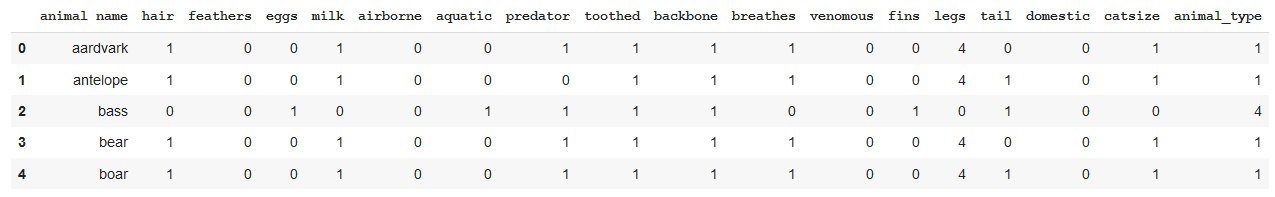
```


In [ ]:
colum_headers = ['animal name', 
                  'hair',		
                  'feathers',	
                  'eggs',		
                  'milk',		
                  'airborne',	
                  'aquatic',
                  'predator',	
                  'toothed'	,
                  'backbone',	
                  'breathes',	
                  'venomous',	
                  'fins',		
                  'legs',		
                  'tail',		
                  'domestic',	
                  'catsize',
                  'animal_type'
                  ]

#############################################################
# Task1: Type your code below to assign above column names to the dataframe
data.columns = colum_headers
#############################################################

data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# Add domain knowladge to name the animal types
replace_dict = {
				  1: 'mammal', 
				  2: 'bird', 
				  3: 'sname', 
				  4: 'fish', 
				  5: 'amphibian', 
				  6: 'insect', 
				  7: 'other invertebrates'}

data['animal_type_name'] = data['animal_type'].replace(replace_dict)
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type,animal_type_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,insect
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,other invertebrates


## 3. Descriptive Statistics
 



* Task 2: Type your code to find how many rows and columns this dataset. Use print stament display the value. 
> image.png

In [ ]:
#############################################################
# Task2: Type your code below to print number of rows and columns.
rows = data.shape[0]
columns = data.shape[1]
#############################################################
print(F"rows = {rows}, columns={columns}")


rows = 101, columns=19


* Task 3: Find and display min, max, mean, median and standard deviation of the column `legs`. You may choose from different methods to do this task. below is the output from one method.
> 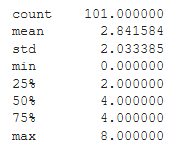

In [ ]:
#############################################################
# Task 3: Type your code below to find and display min, max, mean, median and standard deviation of the column 'legs'.
data['legs'].describe(include='all')
#############################################################

count    101.000000
mean       2.841584
std        2.033385
min        0.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: legs, dtype: float64

* Task 4 : Create a boxplot to visualize the deatils you found in Task 3.




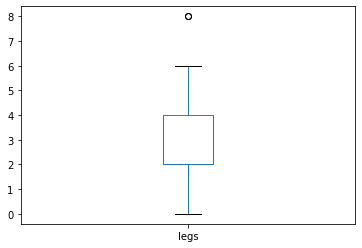

In [ ]:
#############################################################
# Task 4: Type your code to create a box plot using the column 'legs'.
data['legs'].plot(kind='box')
#############################################################

In [ ]:
# Bones/Optional: Did you find any outliers?
# YES

* Task 5: Display the uniqe values in the column `animal_type' 
* Task 6 : Find how many unique values present

In [ ]:
#############################################################
# Task 5: complete the code to get an array of uniqe values in the column `animal_type' and print them.
unique_values = data['animal_type'].unique()
print(unique_values)
#############################################################

[1 4 2 7 6 5 3]


In [ ]:
#############################################################
# Task 6: Type your code to find and display how many unique values in the column `animal_type'.
unique_inLegs = len(unique_values)
print(unique_inLegs)
#############################################################

7


In [ ]:
#############################################################
# Task 7: Type your code to construct and display freqeuncy table for the column 'animal_type'.
data['animal_type'].value_counts()
#############################################################

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: animal_type, dtype: int64

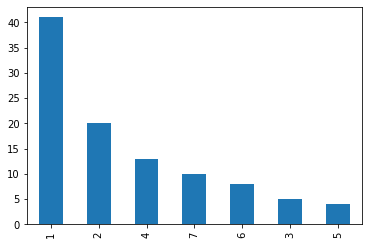

In [ ]:
#############################################################
# Task 8: Display the frequncy table as a bar plot
data['animal_type'].value_counts().plot(kind='bar')
#############################################################

In [ ]:
#############################################################
# Task 9: Select and display the records with `legs` greater than 4
data.loc[data['legs']>4]
#############################################################

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type,animal_type_name
15,crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,other invertebrates
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,insect
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,insect
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6,insect
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,insect
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6,insect
46,lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,other invertebrates
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,insect
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7,other invertebrates
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,other invertebrates


In [ ]:
#############################################################
# Task 10: Complete the code below to compute corelation matrix
correlation_matrix = data[data.columns].corr()

#############################################################

correlation_matrix

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


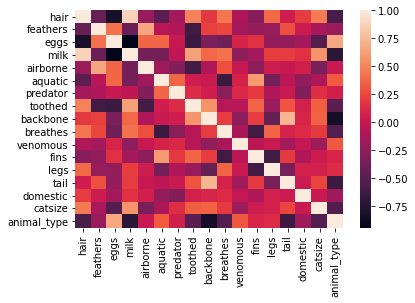

In [ ]:
#############################################################
# Bonus/Optional: Type your code to display corelation matrix as a heat map (hint: you may use heatmap function from the seaborn library)
sns.heatmap(correlation_matrix)
#############################################################

In [ ]:
data.columns

# 4. Building a Machine Learning model
* Task 10:  Identify indepenet (X) and dependent (y) variables.

In [58]:
#############################################################
# Task 10: Identify indepenet (X) and dependent (y) variables and complete the code below. You may need to type of copy column names from the dataframe.
X_variables = ['hair',		
                'feathers',	
                'eggs',		
                'milk',		
                'airborne',	
                'aquatic',
                'predator',	
                'toothed'	,
                'backbone',	
                'breathes',	
                'venomous',	
                'fins',		
                'legs',		
                'tail',		
                'domestic',	
                'catsize']

Y_variables = 'animal_type'
#############################################################

print(F"X_variables = {X_variables}")
print(F"Y_variables = {Y_variables}")

X_variables = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
Y_variables = animal_type


In [51]:
#############################################################
# Bonus/Optional: Type your code to drop two variables suing corelation coefficient

#############################################################

In [52]:
# Due to limted observations avaiable, let's skip train test split for this exercise. 

X_train = data[X_variables]
y_train = data[Y_variables]

y_train.shape

(101, 1)

In [59]:
# Train model
model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [60]:
# get clas names

class_names = [str(c) for c in model.classes_]

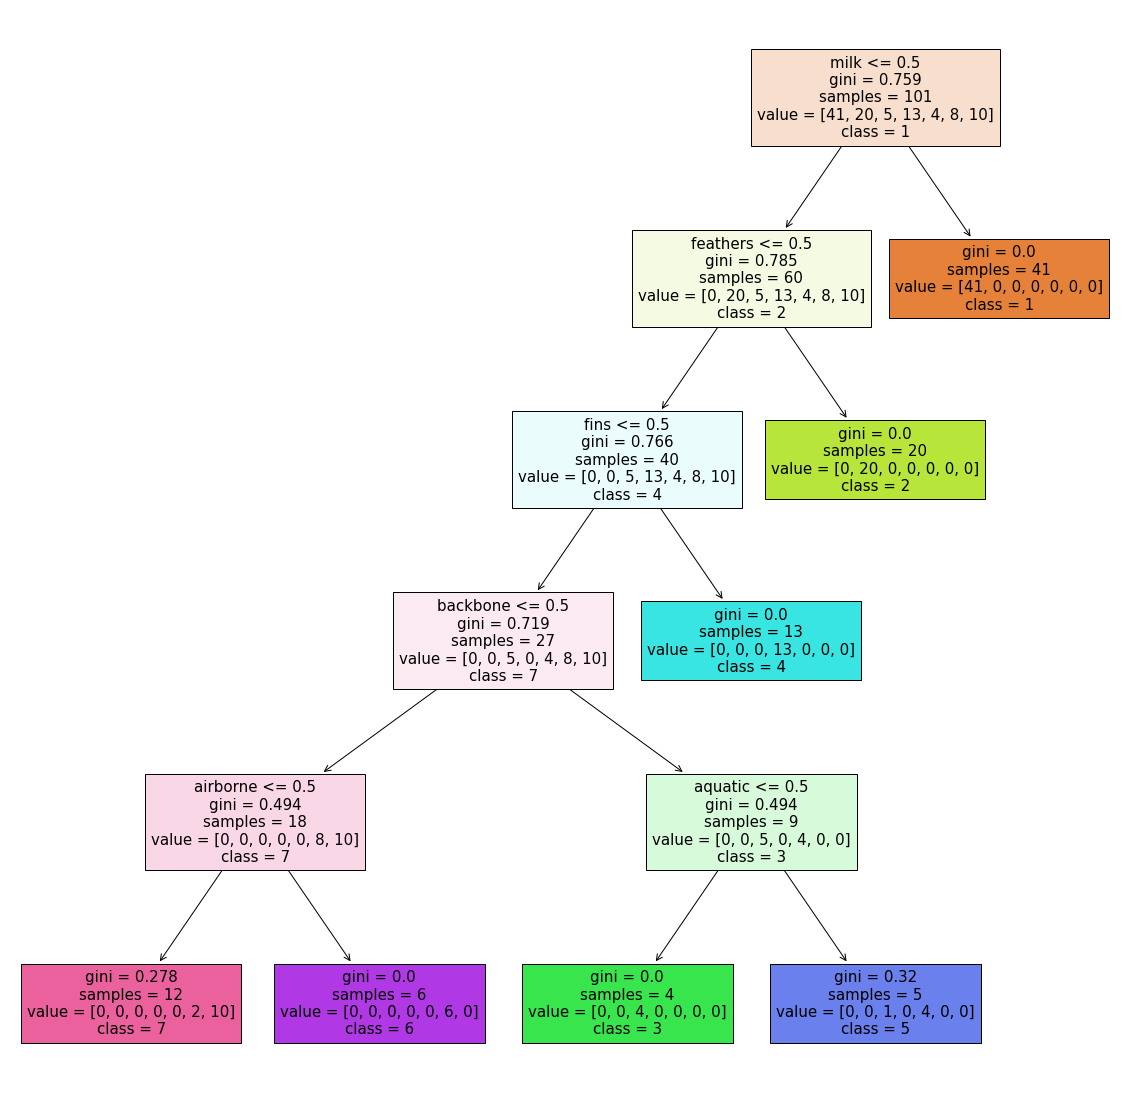

In [61]:
pfig = plt.figure(figsize=(20,20))
tree.plot_tree(model, feature_names=X_variables, class_names=class_names, filled=True)
plt.show()

## Evaluate Model

In [56]:
# make predictions
y_pred = model.predict(X_train)



In [62]:
# construct results dataframe
test_result = pd.DataFrame(data={'y_act':y_train, 'y_pred':y_pred})
test_result.sample(5)

ValueError: ignored

In [ ]:
#############################################################
# Task 11: create confusion matrix
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
#############################################################
cfm

In [ ]:
#############################################################
# Task 12: Compute accuracy 
acuracy_tc = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
#############################################################
acuracy_tc

## Feature Importance

In [ ]:
pd.DataFrame({'Feature': X_variables, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

<hr>
Last update 2021-10-24 by Sumudu Tennakoon